In [61]:
# basic operations
import numpy as np

# for dataframe manipulations
import pandas as pd 

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for missing values
import missingno as mno

# for date time manipulation
import datetime

#To fill missing values
from sklearn.impute import KNNImputer

# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# setting up the background style for the plots
plt.style.use('fivethirtyeight')

In [3]:
airbnbdata=pd.read_csv("/content/Airbnb Dataset 19.csv")


In [4]:
airbnbdata.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [5]:
airbnbdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              249 non-null    int64  
 1   name                            249 non-null    object 
 2   host_id                         249 non-null    int64  
 3   host_name                       249 non-null    object 
 4   neighbourhood_group             249 non-null    object 
 5   neighbourhood                   249 non-null    object 
 6   latitude                        249 non-null    float64
 7   longitude                       249 non-null    float64
 8   room_type                       249 non-null    object 
 9   price                           249 non-null    int64  
 10  minimum_nights                  249 non-null    int64  
 11  number_of_reviews               249 non-null    int64  
 12  last_review                     242 

In [6]:
airbnbdata.shape

(249, 16)

In [7]:
airbnbdata.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,249.000000,2.490000e+02,249.000000,249.000000,249.000000,249.000000,249.000000,242.000000,249.000000,249.000000
mean,31376.771084,1.499884e+05,40.730257,-73.964044,143.971888,8.718876,103.445783,1.091653,1.738956,198.538153
std,18101.018309,4.010393e+05,0.049660,0.029685,91.442975,20.398680,100.337887,1.000168,1.234635,126.048056
min,2539.000000,2.787000e+03,40.631880,-74.080880,35.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,15711.000000,5.014800e+04,40.688430,-73.984980,85.000000,2.000000,21.000000,0.280000,1.000000,75.000000
50%,28321.000000,9.779700e+04,40.721620,-73.964280,125.000000,3.000000,73.000000,0.795000,1.000000,225.000000
75%,46911.000000,1.936370e+05,40.761930,-73.948220,175.000000,5.000000,166.000000,1.650000,2.000000,310.000000
max,62430.000000,6.197784e+06,40.867540,-73.765970,800.000000,200.000000,467.000000,4.720000,6.000000,365.000000


In [8]:
airbnbdata.describe(include=object)

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,249,249,249,249,249,242
unique,249,204,5,55,3,129
top,Clean & quiet apt home by the park,Mark,Manhattan,Williamsburg,Entire home/apt,6/22/2019
freq,1,6,124,26,134,13


VISUALIZATION-1


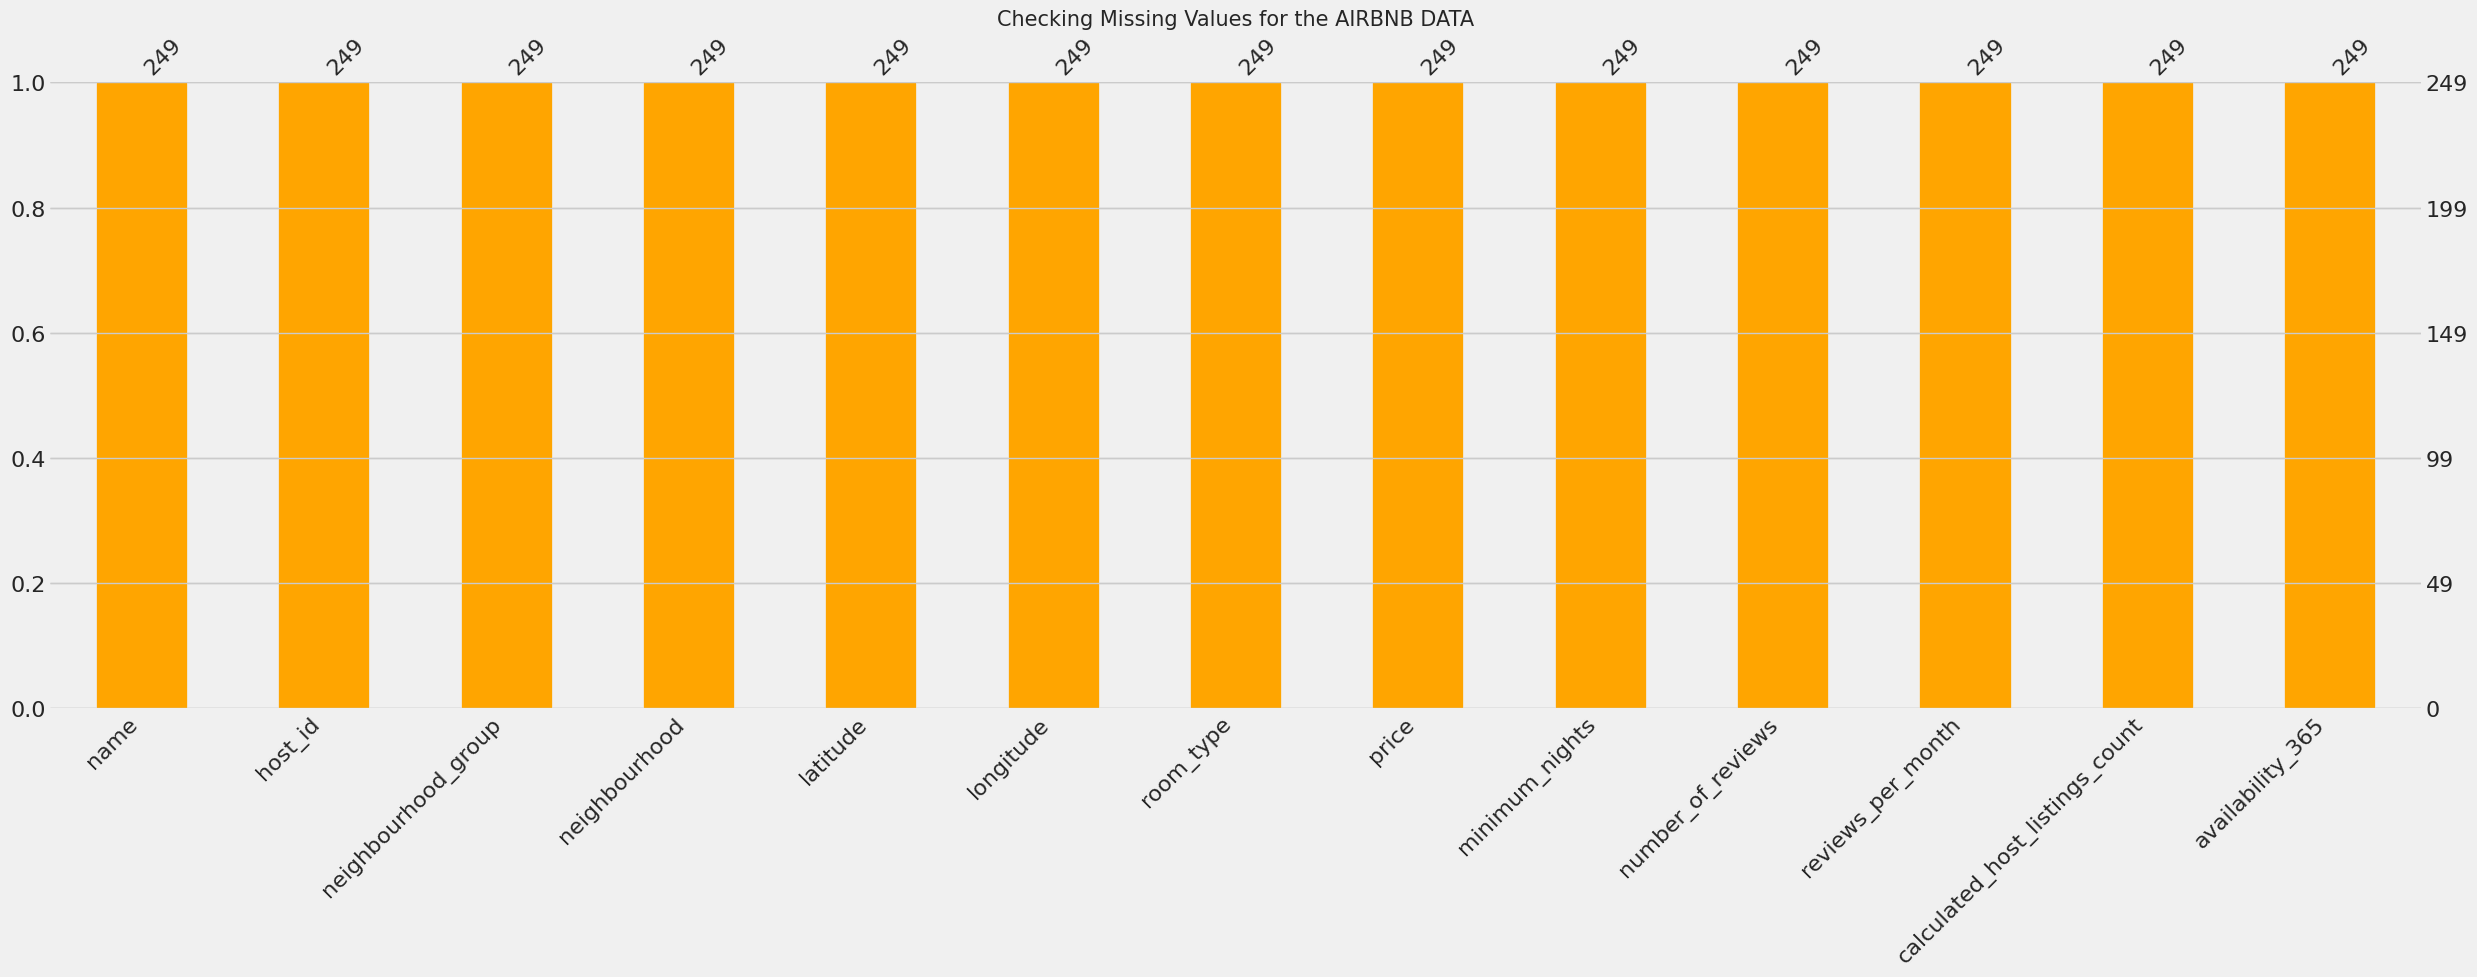

In [64]:
# checking and Visualize missing values as a matrix in a bar chart
print("VISUALIZATION-1")
mno.bar(airbnbdata.iloc[:, :16],
        color = 'orange',
        sort = 'ascending') #to visualize the data in ascending order of missing values
plt.title('Checking Missing Values for the AIRBNB DATA', fontsize = 15)
plt.show()


**CONCLUSION:**

*The above bar chart represents the missing values in the columns which has been ordered ascending and we can conclude that last_review and reviews per month columns having missing values.*

In [10]:
airbnbdata['reviews_per_month'].sample(10)#will display sum random values from the column"reviews_per_month"

5      0.59
58     1.19
225    4.58
133    0.29
67     4.72
102    0.60
119    3.20
60     0.38
136    0.02
243    2.21
Name: reviews_per_month, dtype: float64

In [11]:
airbnbdata.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       7
reviews_per_month                 7
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [12]:
#dropping columns that are not important to do the analysis.  I have decided to drop id and last_review since it is not directly affecting the analysis.
# Also , I preferred to drop the host_name since we can derive the necessary information from host_ID
airbnbdata.drop(['id','host_name','last_review'], axis=1, inplace=True)

In [13]:
airbnbdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            249 non-null    object 
 1   host_id                         249 non-null    int64  
 2   neighbourhood_group             249 non-null    object 
 3   neighbourhood                   249 non-null    object 
 4   latitude                        249 non-null    float64
 5   longitude                       249 non-null    float64
 6   room_type                       249 non-null    object 
 7   price                           249 non-null    int64  
 8   minimum_nights                  249 non-null    int64  
 9   number_of_reviews               249 non-null    int64  
 10  reviews_per_month               242 non-null    float64
 11  calculated_host_listings_count  249 non-null    int64  
 12  availability_365                249 

In [14]:
#replacing null in 'reviews_per_month' with 0
airbnbdata.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
airbnbdata.reviews_per_month.isnull().sum()

0

In [15]:
airbnbdata.neighbourhood_group.unique()# will be helpful in analysising price of each area 

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [16]:
airbnbdata.room_type.unique()# Room size also matters in determining the price which will be our target column

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [17]:
#trying to find out the most listings on Airbnb platform with host ids
topserving_hostids=airbnbdata.host_id.value_counts().head(10)
print(topserving_hostids)

204539    5
126607    3
256161    3
32294     3
9744      3
22486     3
72062     3
72014     3
190409    2
51038     2
Name: host_id, dtype: int64


In [18]:
#setting figure size for visualization purpose
sns.set(rc={'figure.figsize':(8,8)})
sns.set_style('white')

VISUALIZATION 2 



<function matplotlib.pyplot.show(close=None, block=None)>

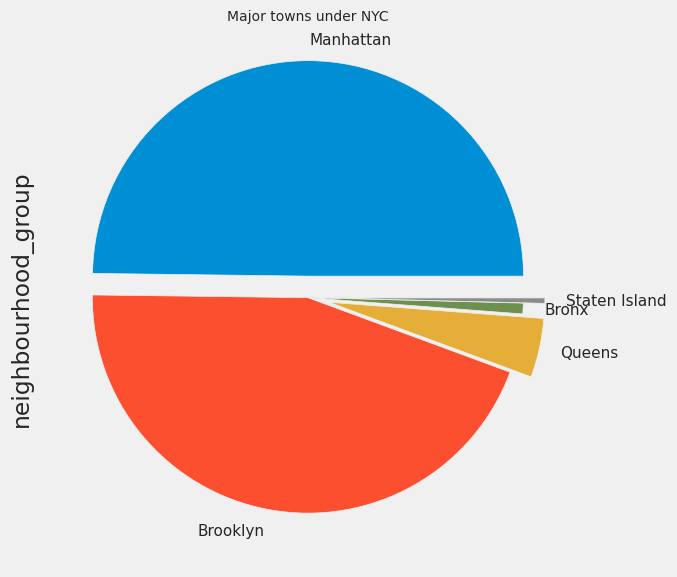

In [70]:
# We'll also look at which town is having most number of listed properties.
# using pieplot to visualize the number of Airbnbs in each town under neighbourhood_group
print("VISUALIZATION 2 \n")

plt.rcParams["figure.figsize"] = [10,6]
plt.rcParams["figure.autolayout"] = True
airbnbdata['neighbourhood_group'].value_counts().head(10).plot(kind = 'pie',explode = [ 0.1, 0, 0.1, 0,0.1])
plt.title('Major towns under NYC', fontsize = 10)
plt.show

**CONCLUSION:**

*From the above piechart we can conclude that Manhattan and Brooklyn have the majority number of listings in compared to other towns like Queens, Staten Island, and Queens . This can be attributed to the fact that both of those neighbourhoods have more of the tourist attractions.*

VISUALIZATION 3 



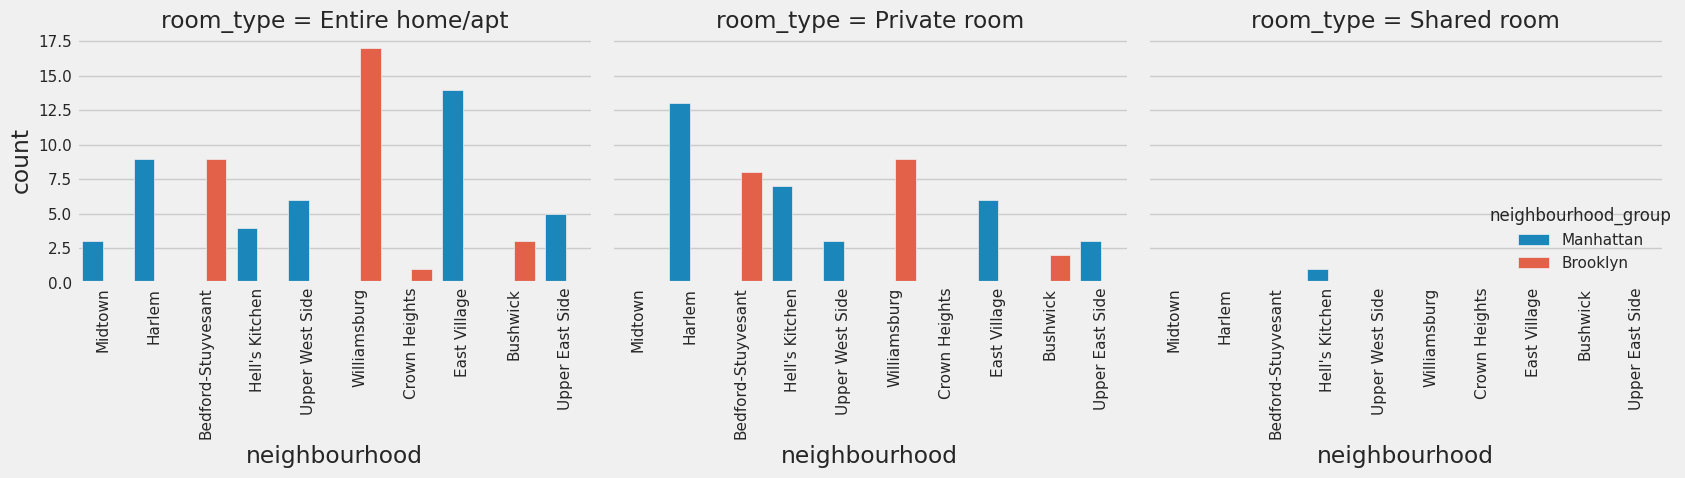

In [69]:
#We can use towns under neighborhood_group and room type for a broad visualization effect

#getting data of top 10 neighbourhoods for sub-dataframe
print("VISUALIZATION 3 \n")
top10neibhorhoods=airbnbdata.loc[airbnbdata['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple attributes in the "room_type" column
top10neibhorhoodssubplotvisualization=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=top10neibhorhoods, kind='count')
top10neibhorhoodssubplotvisualization.set_xticklabels(rotation=90)

**CONCLUSION:**

*The observation from above catplot is that 'Shared room' type Airbnb listing is barely available among 10 most listing-populated neighborhoods. Used only Manhattan and Brooklyn for the graphical representation as these are having most listing availability as per the piechart plotted above. We can also observe that Bedford-Stuyvesant and Williamsburg are the most popular for Brooklyn, and Harlem and East Village for Manhattan.*

VISUALIZATION 4 



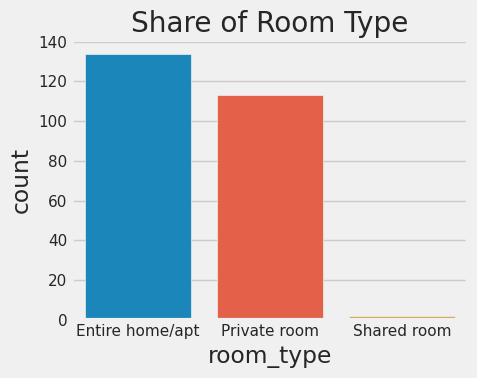

In [71]:
# Countplot used to find the distribution of room type
print("VISUALIZATION 4 \n")
plt.figure(figsize = (5,4))
ax = sns.countplot(x='room_type',data=airbnbdata,order=airbnbdata['room_type'].value_counts().index)
ax.set_title('Share of Room Type')
plt.show()

**CONCLUSION:**

*From the above graphical represenation we can conclude that entire homes and private rooms are the most common.  Also, the demand for shared rooms is typically lower.*

VISUALIZATION 5 



Text(0.5, 1.0, 'Minimum Nights')

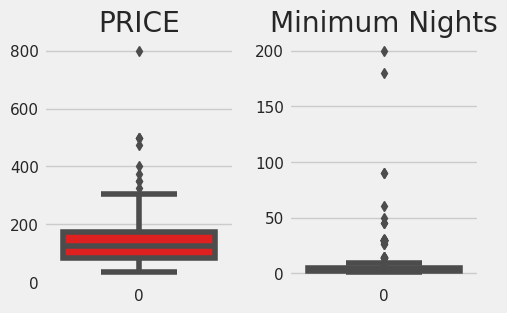

In [72]:
# used boxplot to represent price and minimum nights columns to identify the outliers
print("VISUALIZATION 5 \n")
plt.subplot(2, 4, 1)
sns.boxplot(airbnbdata['price'], color = 'red')
plt.title("PRICE")

plt.subplot(2, 4, 2)
sns.boxplot(airbnbdata['minimum_nights'], color = 'orange')
plt.title("Minimum Nights")

**CONCLUSION:**

*Used boxplot to represent the outlier detection in Price and Minimum Nights columns and to eliminate it*.

VISUALIZATION 6 



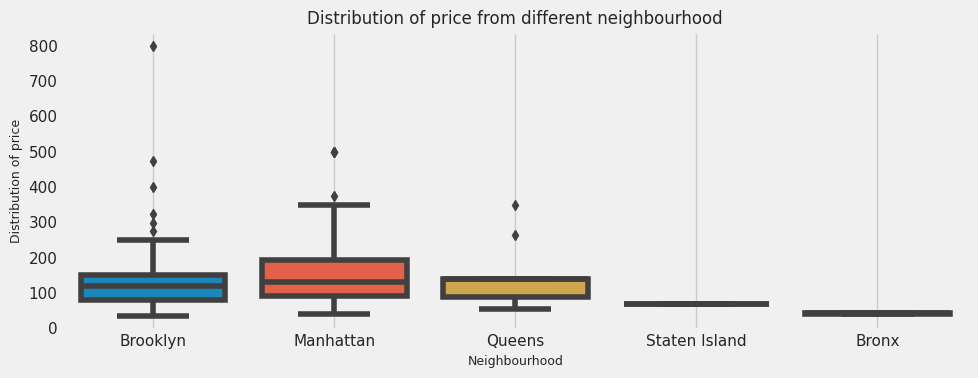

In [73]:
# price distribution by room type
print("VISUALIZATION 6 \n")
plt.rcParams['figure.figsize'] = (10, 4)
ax = sns.boxplot(x = airbnbdata['neighbourhood_group'], y = airbnbdata['price'])
ax.set_xlabel(xlabel = 'Neighbourhood', fontsize = 9)
ax.set_ylabel(ylabel = 'Distribution of price', fontsize = 9)
ax.set_title(label = 'Distribution of price from different neighbourhood', fontsize = 12)
plt.grid()
plt.show()

**CONCLUSION**

*In the above boxplot we can see that the distribution of prices of properties based on which neighbourhood group they belong to. We can see that Manhattan sems to have more of the higher priced properties. Bronx, Staten Island, and Queens have much more reasonable prices compared to Brooklyn and Manhattan*.

VISUALIZATION 7 



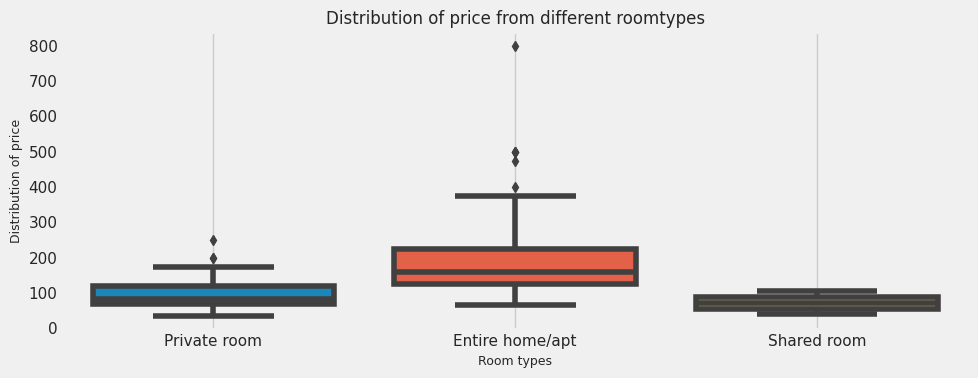

In [74]:
# price distribution by room type
print("VISUALIZATION 7 \n")
plt.rcParams['figure.figsize'] = (10, 4)
ax = sns.boxplot(x = airbnbdata['room_type'], y = airbnbdata['price'])
ax.set_xlabel(xlabel = 'Room types', fontsize = 9)
ax.set_ylabel(ylabel = 'Distribution of price', fontsize = 9)
ax.set_title(label = 'Distribution of price from different roomtypes', fontsize = 12)
plt.grid()
plt.show()

**CONCLUSION**:

*As per above boxplot shared rooms have the lowest mean price, while entire homes have the highest. All room types seem to have a similar price distribution; however, private rooms and shared rooms seemd to be more centered around their mean.*

HRDATA ANALYSIS

In [25]:
hrdata=pd.read_csv("/content/HRDataset_v14.csv")

In [26]:
hrdata.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [27]:
hrdata.shape

(311, 36)

In [28]:
hrdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [29]:
hrdata.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

**DATA CLEANING**

*From the above we can see that DateofTermination having 207 null values.  There are no other columns in the dataset from which we can derive this information.  ALso, these are specific dates hence not decided to go ahead with filling with values but instead proceeded with dropna function to eliminate the null values.*

In [30]:
hrdataupdated=hrdata['DateofTermination'].dropna(how='all')

In [31]:
hrdataupdated.isnull().sum()

0

**DATA CLEANING:**
DROP SOME IRRELEVANT COLUMNS FOR HR DATA SET

In [32]:
hrdata.drop(['DaysLateLast30','LastPerformanceReview_Date',
         'DateofTermination','TermReason','DaysLateLast30','Zip'],axis=1,inplace=True)

In [33]:
hrdata.drop(['Employee_Name','EmpID','MaritalStatusID','GenderID','EmpStatusID','DeptID','FromDiversityJobFairID','PositionID','Termd'],axis=1,inplace=True)

In [34]:
hrdata.drop(['ManagerName'], axis=1,inplace=True)

In [35]:
hrdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MarriedID             311 non-null    int64  
 1   PerfScoreID           311 non-null    int64  
 2   Salary                311 non-null    int64  
 3   Position              311 non-null    object 
 4   State                 311 non-null    object 
 5   DOB                   311 non-null    object 
 6   Sex                   311 non-null    object 
 7   MaritalDesc           311 non-null    object 
 8   CitizenDesc           311 non-null    object 
 9   HispanicLatino        311 non-null    object 
 10  RaceDesc              311 non-null    object 
 11  DateofHire            311 non-null    object 
 12  EmploymentStatus      311 non-null    object 
 13  Department            311 non-null    object 
 14  ManagerID             303 non-null    float64
 15  RecruitmentSource     3

**CONCLUSION:**

*With above code we have deleted all irrelevant columns and columns count has been reduced from 35 to 19.*

In [36]:
print(hrdata['PerformanceScore'].unique())
print(hrdata['PerfScoreID'].unique())

['Exceeds' 'Fully Meets' 'Needs Improvement' 'PIP']
[4 3 2 1]


DATA ANALYSIS PART

VISUALIZATION 8 



<Axes: xlabel='Sex', ylabel='count'>

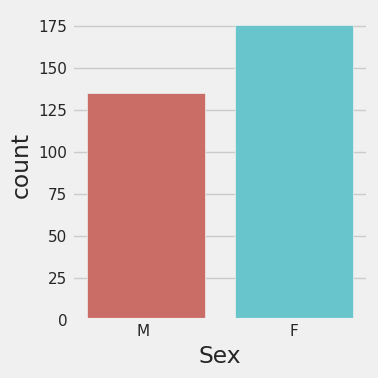

In [75]:
#Male vs Female distribution in HR data set
print("VISUALIZATION 8 \n")
plt.rcParams['figure.figsize'] = (4,4)
sns.countplot(x='Sex',data=hrdata,palette='hls')

**CONCLUSION:**

*The above bar graph represention from HRdata shows female distribution is more in the company than male.*

VISUALIZATION 9 



<Axes: xlabel='Department', ylabel='count'>

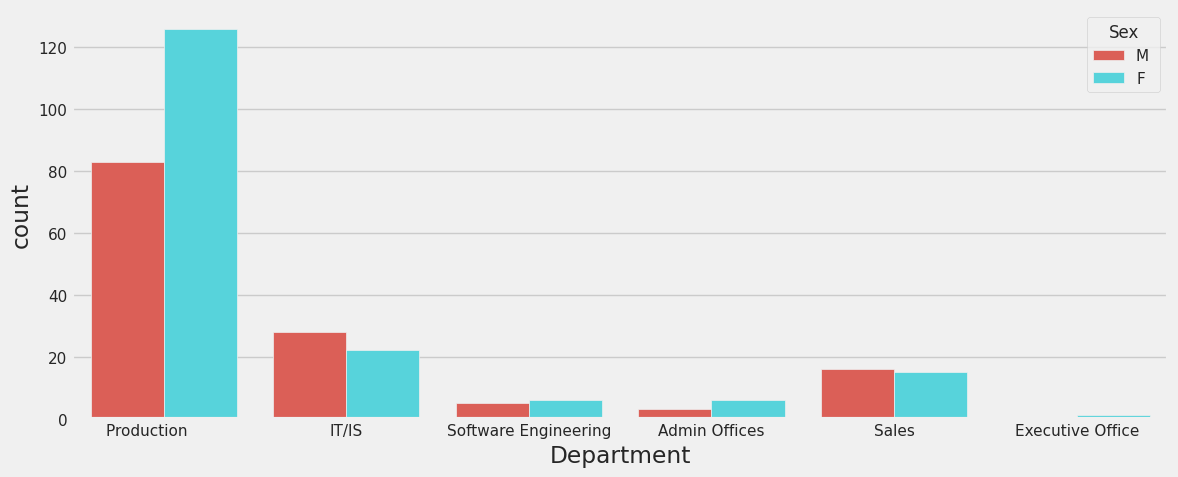

In [76]:
#Distribution of female and male employees among the different departments of the company
print("VISUALIZATION 9 \n")
plt.figure(figsize=(12,5))
sns.countplot(x='Department',data=hrdata,hue='Sex',palette='hls', saturation=1)

**CONCLUSION:**

***In the above bar graph representation we can see that Production department having more number of employees in compared to other departments. This data we can use it later for broader analytics in terms of performance of the employees.***

In [77]:
print("VISUALIZATION 10 \n")
@interact
def Performance(Performance=list(hrdata['PerformanceScore'].unique())):
  return hrdata[hrdata['PerformanceScore'] == Performance][['Salary', 'Position', 'Sex', 'Department', 'ManagerID','PerfScoreID']].sort_values(by = 'PerfScoreID', ascending = False).head(15).style.background_gradient(cmap = 'magma')


VISUALIZATION 10 



interactive(children=(Dropdown(description='Performance', options=('Exceeds', 'Fully Meets', 'Needs Improvemen…

**CONCLUSION:**

From the above representation we will get a glance of performance of employees and which dept they belongs to and under which manager they are working etc.  DUring Employee Appreciation and Employee Attrition we can consider all these factors.

